# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

MovieWriter imagemagick unavailable; using Pillow instead.
c:\Users\dlim\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


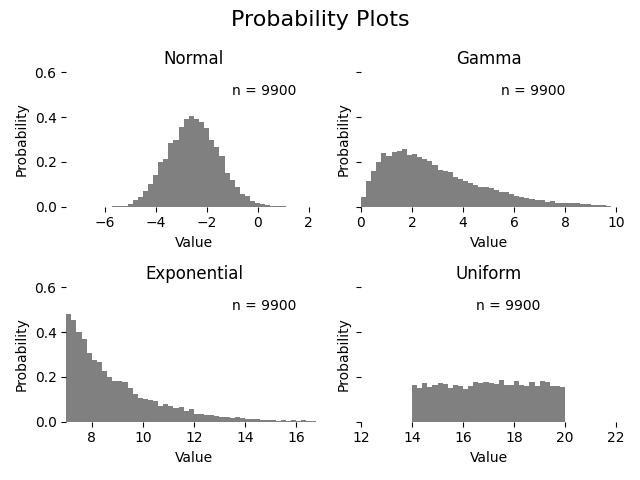

In [5]:
from matplotlib.dates import num2epoch
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from  matplotlib.widgets import Slider

from matplotlib import animation, rc
from IPython.display import HTML, Image

%matplotlib widget

sample_size = 10000

x1 = np.random.normal(-2.5, 1, sample_size)
x2 = np.random.gamma(2, 1.5, sample_size)
x3 = np.random.exponential(2, sample_size)+7
x4 = np.random.uniform(14,20, sample_size)

x = [x1, x2, x3, x4]

axis1 = [-7.5, 2.5, 0, 0.6]
axis2 = [0, 10, 0, 0.6]
axis3 = [7, 17, 0, 0.6]
axis4 = [12, 22, 0, 0.6]
axis = [axis1, axis2, axis3, axis4]

titles = ['Normal', 'Gamma', 'Exponential', 'Uniform']

bins1 = np.arange(-7.5, 2.5, 0.2)
bins2 = np.arange(0, 10, 0.2)
bins3 = np.arange(7, 17, 0.2)
bins4 = np.arange(12, 22, 0.2)
bins = [bins1, bins2, bins3, bins4]

anno_x = [-1, 5.5, 13.5, 16.5]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True)
ax = [ax1, ax2, ax3, ax4]

num = 100

def update(curr):
    if curr == num:
        a.event_source.stop()
    for i in range(len(ax)):
        ax[i].cla()
        ax[i].hist(x[i][:num*curr], density = True, bins = bins[i], color='gray', align='mid')
        ax[i].axis(axis[i])
        ax[i].set_title(titles[i])
        ax[i].set_ylabel('Probability')
        ax[i].set_xlabel('Value')
        ax[i].set_frame_on(False)
        ax[i].annotate('n = {}'.format(num*curr), [anno_x[i], 0.5])
    plt.tight_layout()
    
fig.suptitle('Probability Plots',fontsize=16)
a = animation.FuncAnimation(fig, update, interval = num, frames = num, blit=True, repeat=False)

a.save('animation.gif', writer='imagemagick', fps=60)